# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Erika Winfellina Sibarani
- **Email:** winfellinaerika@gmail.com
- **ID Dicoding:** erika_winfellina_sibarani_UCTq

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda per jam dan perhari?
- Di jam dan di hari apakah permintaan peminjaman paling tinggi dan paling rendah?
- Apakah ada perbedaan yang signifikan antara peminjaman di holiday dan workingday setiap tahunnya?
- Bagaimana korelasi jumlah peminjaman sepeda dengan cuaca dan musim?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

 Pada tahap ini, kita akan mengumpulkan semua data yang dibutuhkan.

In [ ]:
#Menampilkan day_df
day_df = pd.read_csv("/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Menampilkan hour_df
hour_df = pd.read_csv("/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Informasi yang diberikan oleh hour_df dan day_df tidak jauh berbeda. Perbedaannya hanya hour_df memiliki kolom "hr" yang memberikan informasi terkait jam peminjaman. Oleh karena itu, untuk efisiensi proses analisis, kita **hanya akan menggunakan hour_df** untuk proses selanjutnya.

### Assessing Data

Selanjutnya, kita masuk ke tahap penilaian kualitas dari seluruh data yang akan digunakan. Proses ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.

In [ ]:
#Mengidentifikasi data type hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat kesalahan tipe data untuk kolom "dteday". Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object.

In [ ]:
#Mengidentifikasi missing value hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Hasil di atas menunjukkan bahwa tidak ada missing value pada hour_df.

In [ ]:
# Mengidentifikasi Apakah Terdapat Duplikasi Pada Data
print(hour_df.duplicated().sum())

0


Hasil di atas menunjukkan bahwa tidak ada duplikasi pada hour_df

In [ ]:
#Memeriksa parameter statistik hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Hasil di atas menunjukkan tidak terdapat keanehan dalam ringkasan parameter statistik dari hour_df.

**Insight:**
- Tidak ada missing value, duplikasi, dan keanehan di parameter statistik
- Terdapat kesalahan tipe data untuk kolom dteday

### Cleaning Data

Sekarang kita akan memasuki proses terakhir dalam data wrangling yaitu pembersihan atau cleaning data. Pada tahap ini, kita akan membersihkan masalah yang telah teridentifikasi dalam proses assessing data. Selain itu, kita akan menghapus beberapa informasi yang tidak diperlukan untuk menjawab pertanyaan analisis.

In [ ]:
# Mengubah tipe data di hour_df ke datetime
hour_df['dteday'] = pd.to_datetime(hour_df.dteday)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
#Menghapus kolom instant, hum, temp, atemp, dan windspeed di hour_df
drop_col = ['instant','hum','temp','atemp', 'windspeed', 'casual', 'registered']

for i in hour_df.columns:
  if i in drop_col:
    hour_df.drop(labels=i, axis=1, inplace=True)
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt
0,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,Clear/Partly Cloudy,16
1,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,Clear/Partly Cloudy,40
2,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,Clear/Partly Cloudy,32
3,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,Clear/Partly Cloudy,13
4,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,Clear/Partly Cloudy,1


In [ ]:
# Mengkonversi isi kolom agar mudah dipahami
# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi mnth menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
hour_df.weathersit.replace((1,2,3,4), ('Clear/Partly Cloudy','Misty/Cloudy','Light Snow/Rain','Heavy Snow/Rain'), inplace=True)

# konversi weekday menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# konversi yr menjadi: 0:2011, 1:2012
hour_df.yr.replace((0,1), ('2011','2012'), inplace=True)
hour_df.head()

<ipython-input-20-f7fae02b4bb9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
<ipython-input-20-f7fae02b4bb9>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt
0,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,Clear/Partly Cloudy,16
1,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,Clear/Partly Cloudy,40
2,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,Clear/Partly Cloudy,32
3,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,Clear/Partly Cloudy,13
4,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,Clear/Partly Cloudy,1


## Exploratory Data Analysis (EDA)

### Explore Data

In [ ]:
#Menampilkan rangkuman parameter statistik
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt
count,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000
unique,731,4,2,12,NaN,NaN,7,NaN,4,NaN
top,2011-01-01,Fall,2012,May,NaN,NaN,Saturday,NaN,Clear/Partly Cloudy,NaN
freq,24,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN
mean,NaN,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,189.463088
std,NaN,NaN,NaN,NaN,6.914405,0.167165,NaN,0.465431,NaN,181.387599
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,40.000000
50%,NaN,NaN,NaN,NaN,12.000000,0.000000,NaN,1.000000,NaN,142.000000
75%,NaN,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000,NaN,281.000000


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi bahwa:
- peminjaman terjadi selama 24 jam dengan rata-rata terjadi pada pukul 11.54 dan standar deviasinya sebesar 6.91 jam.
- peminjaman terjadi setiap hari dengan rata-rata terjadi pada hari Rabu dan standar deviasinya sebesar 2.0006 hari.

In [ ]:
# Menampilkan jumlah penyewaan per jam
hour_df.groupby(by='hr').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                        
    max min        mean     sum
hr                             
0   283   2   53.898072   39130
1   168   1   33.375691   24164
2   132   1   22.869930   16352
3    79   1   11.727403    8174
4    28   1    6.352941    4428
5    66   1   19.889819   14261
6   213   1   76.044138   55132
7   596   1  212.064649  154171
8   839   5  359.011004  261001
9   426  14  219.309491  159438
10  539   8  173.668501  126257
11  663  10  208.143054  151320
12  776   3  253.315934  184414
13  760  11  253.661180  184919
14  750  12  240.949246  175652
15  750   7  251.233196  183149
16  783  11  311.983562  227748
17  976  15  461.452055  336860
18  977  23  425.510989  309772
19  743  11  311.523352  226789
20  567  11  226.030220  164550
21  584   6  172.314560  125445
22  502   9  131.335165   95612
23  256   2   87.831044   63941

Berdasarkan tabel di atas, kita mendapatkan informasi bahwa jumlah penyewaan sepeda paling banyak terjadi pada rentang pukul 17.00 - 17.59 dan yang paling sedikit pada rentang pukul 04.00 - 04.59

In [ ]:
# Menampilkan jumlah penyewaan per hari
hour_df.groupby(by='weekday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                        
         max min        mean     sum
weekday                             
0        776   1  177.468825  444027
1        968   1  183.744655  455503
2        970   1  191.238891  469109
3        977   1  191.130505  473048
4        976   1  196.436665  485395
5        957   1  196.135907  487790
6        783   1  190.209793  477807

Berdasarkan tabel di atas, kita mendapatkan informasi bahwa jumlah penyewaan sepeda paling banyak terjadi pada hari Jumat dan yang paling sedikit pada hari Minggu.

In [ ]:
# Menampilkan jumlah penyewaan per cuaca
hour_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                         
                     max min        mean      sum
weathersit                                       
Clear/Partly Cloudy  977   1  204.869272  2338173
Heavy Snow/Rain      164  23   74.333333      223
Light Snow/Rain      891   1  111.579281   158331
Misty/Cloudy         957   1  175.165493   795952

Dapat dilihat bahwa jumlah penyewaan paling banyak di cuaca cerah dan paling sedikit di cuaca buruk.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda per jam dan perhari?

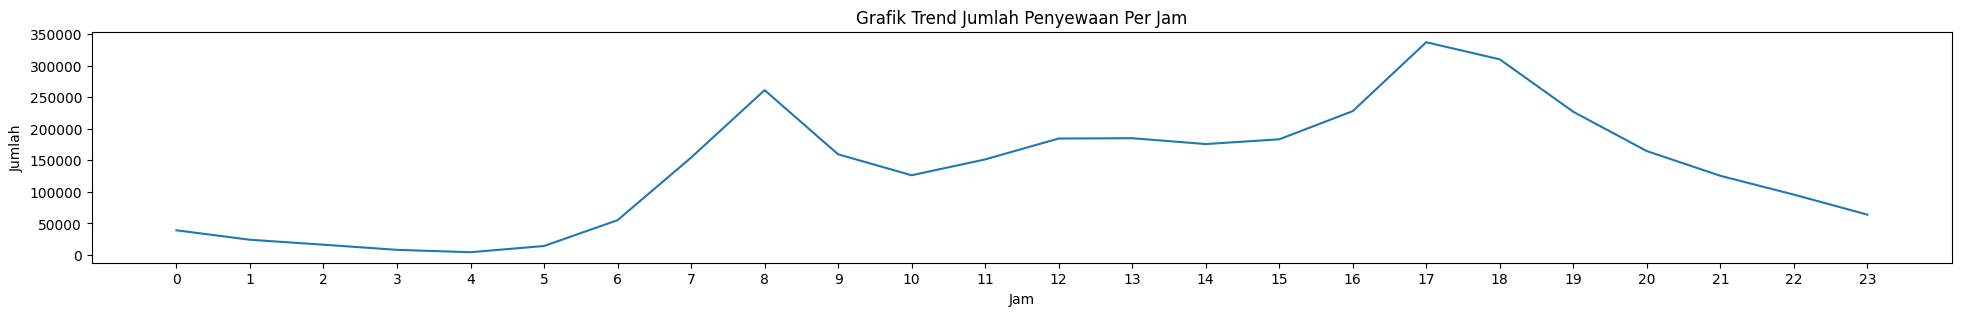

In [ ]:
#Membuat grafik tren jumlah penyewaan per jam
hourly_counts = hour_df['cnt'].groupby(hour_df['hr']).sum()
plt.figure(figsize=(24,3))
plt.plot(hourly_counts.index, hourly_counts.values)
plt.xlabel('Jam')
plt.xticks(range(24))
plt.ylabel('Jumlah')
plt.title('Grafik Trend Jumlah Penyewaan Per Jam')
plt.show()

Grafik di atas menunjukkan tren jumlah penyewaan sepeda per jam. Dari grafik ini, kita dapat melihat beberapa pola menarik:
- Puncak Penyewaan: Jumlah penyewaan sepeda mencapai puncaknya pada sekitar jam 17. Ini menunjukkan bahwa banyak orang menyewa sepeda di sore hari, mungkin untuk berolahraga atau bepergian pulang kerja.
- Penurunan Drastis di Malam Hari: Setelah mencapai puncaknya, jumlah penyewaan sepeda menurun drastis setelah jam 20. Ini menunjukkan bahwa aktivitas penyewaan sepeda menurun signifikan di malam hari.
- Peningkatan di Pagi Hari: Ada peningkatan jumlah penyewaan sepeda di pagi hari, sekitar jam 7-8. Ini mungkin menunjukkan bahwa banyak orang menggunakan sepeda untuk pergi bekerja atau bersekolah.
- Periode Tenang: Pada tengah malam hingga dini hari, jumlah penyewaan sepeda sangat sedikit, bahkan mendekati nol. Ini menunjukkan bahwa hampir tidak ada aktivitas penyewaan sepeda selama periode ini.

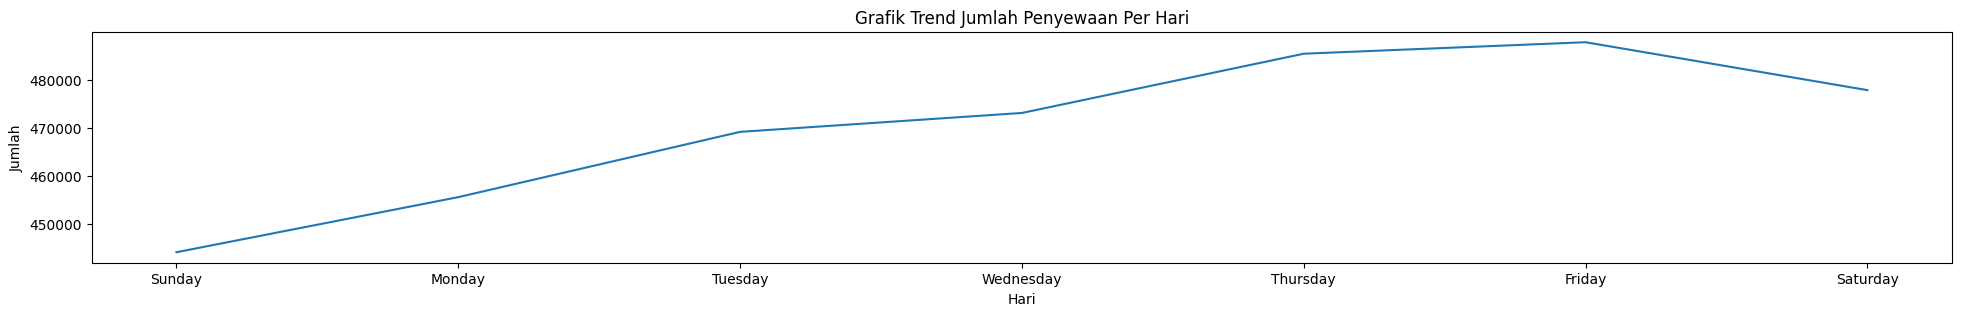

In [ ]:
#Membuat grafik tren jumlah penyewaan per hari
daily_counts = hour_df['cnt'].groupby(hour_df['weekday']).sum()
plt.figure(figsize=(24,3))
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_counts = daily_counts.reindex(weekday_order)
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.title('Grafik Trend Jumlah Penyewaan Per Hari')
plt.show()

Grafik di atas menunjukkan pola penyewaan sepeda yang fluktuatif sepanjang satu minggu. Berikut adalah beberapa poin penting yang bisa kita lihat dari grafik tersebut:

- Tren Meningkat: Secara umum, jumlah penyewaan sepeda cenderung meningkat dari awal minggu hingga mencapai puncaknya di pertengahan minggu (Kamis). Ini menunjukkan bahwa permintaan akan sepeda cenderung lebih tinggi pada pertengahan minggu.
- Penurunan di Akhir Pekan: Setelah mencapai puncaknya pada hari Kamis, jumlah penyewaan sepeda mulai menurun dan mencapai titik terendah pada hari Minggu. Ini mengindikasikan bahwa aktivitas penyewaan sepeda lebih rendah pada akhir pekan dibandingkan hari kerja.

### Pertanyaan 2: Di jam dan di hari apakah permintaan peminjaman paling tinggi dan paling rendah?

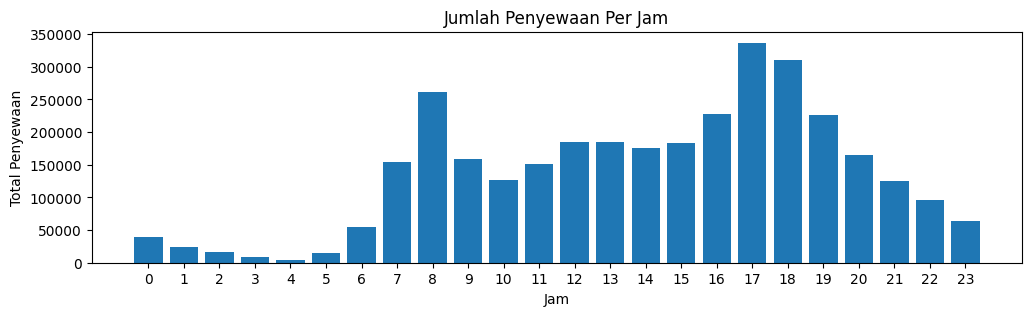

In [ ]:
#Membuat bar chart untuk jumlah penyewaan per jam
hourly_rentals = hour_df.groupby('hr')['cnt'].sum()
plt.figure(figsize=(12, 3))
plt.bar(hourly_rentals.index, hourly_rentals.values)
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan')
plt.title('Jumlah Penyewaan Per Jam')
plt.xticks(range(24))
plt.show()


Jumlah penyewaan sepeda mencapai puncaknya pada sekitar jam 17 atau pukul 5 sore. Ini menunjukkan bahwa banyak orang menyewa sepeda di sore hari, mungkin untuk berolahraga atau bepergian pulang kerja.

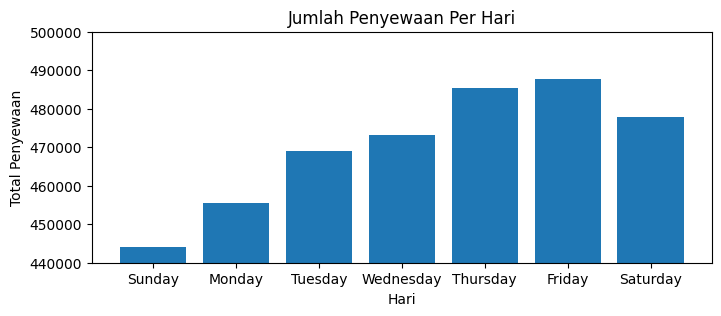

In [ ]:
#Membuat bar chart untuk jumlah penyewaan per hari
daily_rentals = hour_df['cnt'].groupby(hour_df['weekday']).sum()
plt.figure(figsize=(8, 3))
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_rentals = daily_rentals.reindex(weekday_order)
plt.bar(daily_rentals.index, daily_rentals.values)
plt.xlabel('Hari')
plt.ylabel('Total Penyewaan')
plt.title('Jumlah Penyewaan Per Hari')
plt.xticks(range(7))
plt.ylim(440000,500000)
plt.show()

Terdapat perbedaan jumlah penyewaan sepeda di setiap harinya dengan puncak peminjaman terjadi di hari Jumat.

### Pertanyaan 3: Apakah ada perbedaan yang signifikan dalam peminjaman di holiday dan workingday setiap tahunnya?

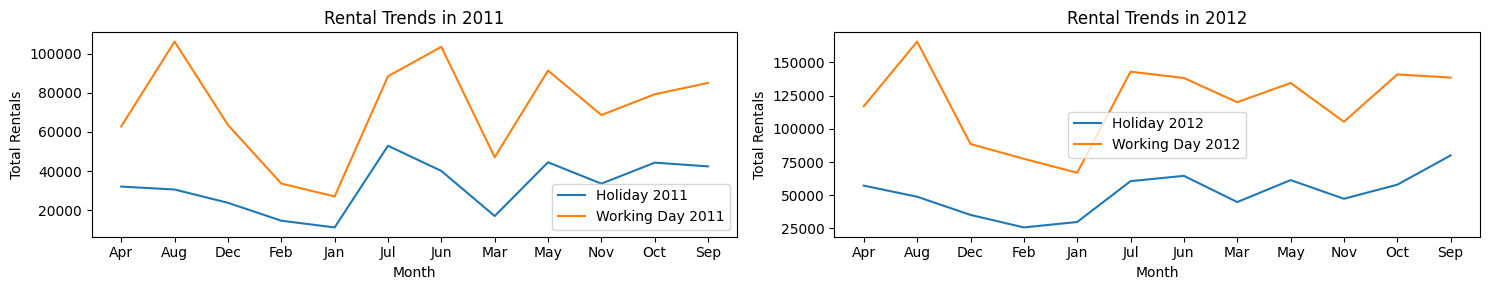

In [ ]:
#Menampilkan plot perbedaan jumlah penyewaan sepeda
hour_df_2011 = hour_df[hour_df['yr'] == '2011']
hour_df_2012 = hour_df[hour_df['yr'] == '2012']
workingday_rentals_2011 = hour_df_2011.groupby(['workingday', 'mnth'])['cnt'].sum().unstack()
workingday_rentals_2012 = hour_df_2012.groupby(['workingday', 'mnth'])['cnt'].sum().unstack()
plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
plt.plot(workingday_rentals_2011.loc[0], label='Holiday 2011')
plt.plot(workingday_rentals_2011.loc[1], label='Working Day 2011')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.title('Rental Trends in 2011')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(workingday_rentals_2012.loc[0], label='Holiday 2012')
plt.plot(workingday_rentals_2012.loc[1], label='Working Day 2012')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.title('Rental Trends in 2012')
plt.legend()
plt.tight_layout()
plt.show()

Dari grafik tersebut, dapat kita simpulkan bahwa:
- Jumlah penyewaan sepeda pada hari kerja jauh lebih tinggi dibandingkan hari libur. Ini terlihat dari grafik yang mewakili hari kerja relatif lebih tinggi dibandingkan batang grafik yang mewakili hari libur.
- Perbedaan yang signifikan: Terdapat perbedaan yang cukup signifikan antara jumlah penyewaan sepeda pada kedua jenis hari tersebut. Hal ini mengindikasikan bahwa faktor hari kerja atau hari libur memiliki pengaruh yang kuat terhadap permintaan akan layanan penyewaan sepeda.


### Pertanyaan 4: Bagaimana korelasi jumlah peminjaman sepeda dengan cuaca dan musim?

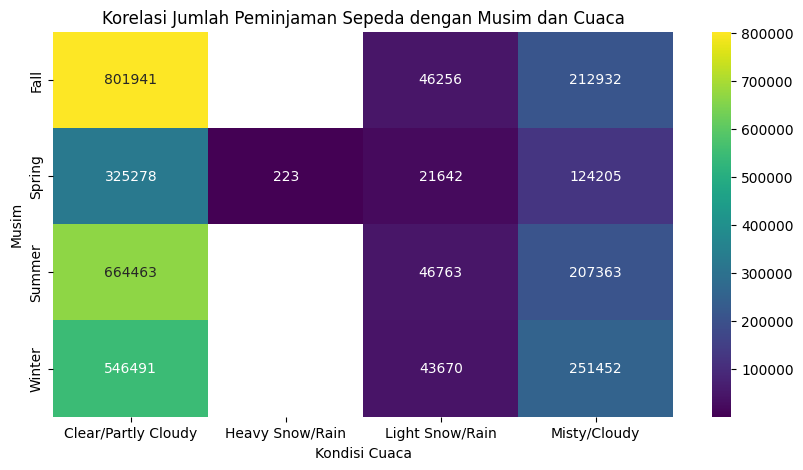

In [ ]:
#Membuat heatmap untuk memvisualisasikan korelasi antara musim, cuaca, dan jumlah penyewaan
season_weather_rentals = hour_df.groupby(['season', 'weathersit'])['cnt'].sum().unstack()
plt.figure(figsize=(10, 5))
sns.heatmap(season_weather_rentals, annot=True, fmt='.0f', cmap='viridis')
plt.title('Korelasi Jumlah Peminjaman Sepeda dengan Musim dan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Musim')
plt.show()


Berdasarkan hasil visualisasi heatmap di atas, kita dapat menarik kesimpulan bahwa:
- Musim Panas Dominan: Secara keseluruhan, musim panas menunjukkan jumlah
peminjaman sepeda tertinggi untuk semua kondisi cuaca, kecuali pada kondisi "Heavy Snow/Rain" yang mana jumlah peminjamannya sangat rendah (hampir nol). Ini menunjukkan bahwa orang-orang lebih cenderung menggunakan sepeda saat cuaca hangat.
- Pengaruh Cuaca: Kondisi cuaca "Clear/Partly Cloudy" secara konsisten menghasilkan jumlah peminjaman tertinggi di semua musim. Sebaliknya, kondisi "Heavy Snow/Rain" selalu menghasilkan jumlah peminjaman terendah. Ini menunjukkan bahwa cuaca cerah mendukung aktivitas bersepeda, sementara cuaca buruk seperti salju atau hujan lebat sangat mengurangi minat bersepeda.
- Interaksi Musim dan Cuaca:
Musim Dingin: Meskipun jumlah peminjaman secara keseluruhan lebih rendah dibandingkan musim lainnya, kondisi "Clear/Partly Cloudy" pada musim dingin masih menghasilkan jumlah peminjaman yang cukup signifikan. Ini menunjukkan bahwa bahkan di musim dingin, orang-orang masih akan bersepeda jika cuaca memungkinkan.
Musim Gugur: Musim gugur menunjukkan pola yang mirip dengan musim panas, dengan jumlah peminjaman tertinggi pada kondisi "Clear/Partly Cloudy".



## Conclusion

- Conclusion pertanyaan 1 : Dapat disimpulkan bahwa aktivitas penyewaan memiliki puncak aktivitas terjadi di sore hari, sementara periode terendah terjadi di tengah malam hingga dini hari. Secara umum, jumlah penyewaan sepeda cenderung meningkat dari awal minggu hingga mencapai puncaknya di pertengahan minggu (Kamis). Ini menunjukkan bahwa permintaan akan sepeda cenderung lebih tinggi pada pertengahan minggu.

- Conclusion pertanyaan 2: Dalam per hari, jumlah penyewaan sepeda mencapai puncaknya pada sekitar jam 17 atau pukul 5 sore. Sedangkan dalam per minggu, jumlah penyewaan sepeda mencapai puncaknya pada hari Jumat.

- Conclusion pertanyaan 3: Dari grafik terlihat jelas adanya perbedaan pola penyewaan sepeda antara hari kerja dan hari libur, baik pada tahun 2011 maupun 2012. Jumlah penyewaan sepeda pada hari kerja cenderung lebih stabil dan lebih tinggi dibandingkan hari libur.

- Conclution pertanyaan 4 : Baik musim maupun kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda. Kombinasi musim panas dan cuaca cerah adalah faktor yang paling mendukung aktivitas bersepeda, sementara kombinasi musim dingin dan cuaca buruk sangat mengurangi minat bersepeda.

In [ ]:
# prompt: buatlah readme.md untuk proyek ini

%%writefile README.md
# Proyek Analisis Data: Bike Sharing Dataset

**Nama:** Erika Winfellina Sibarani
**Email:** winfellinaerika@gmail.com
**ID Dicoding:** erika_winfellina_sibarani_UCTq


## Deskripsi Proyek

Proyek ini bertujuan untuk menganalisis data peminjaman sepeda dengan menggunakan dataset Bike Sharing. Analisis ini mencakup pengungkapan tren, pola, dan faktor-faktor yang memengaruhi permintaan peminjaman sepeda.

## Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda per jam dan perhari?
- Di jam dan di hari apakah permintaan peminjaman paling tinggi dan paling rendah?
- Apakah ada perbedaan yang signifikan antara peminjaman di holiday dan workingday setiap tahunnya?
- Bagaimana korelasi jumlah peminjaman sepeda dengan cuaca dan musim?

## Dataset

Data yang digunakan dalam proyek ini adalah dataset Bike Sharing yang terdiri dari data peminjaman sepeda per jam dan per hari.

## Langkah-Langkah Analisis

1. **Data Wrangling:**
    - Mengumpulkan data dari sumber yang tersedia.
    - Menilai kualitas data, seperti missing value, tipe data yang salah, dan duplikasi.
    - Membersihkan data dengan memperbaiki kesalahan dan menghapus data yang tidak relevan.

2. **Exploratory Data Analysis (EDA):**
    - Mengeksplorasi data untuk menemukan pola dan tren.
    - Memvisualisasikan data untuk memberikan pemahaman yang lebih baik.

3. **Visualization & Explanatory Analysis:**
    - Menjawab pertanyaan bisnis dengan membuat visualisasi dan analisis yang komprehensif.

## Kesimpulan

- **Tren peminjaman:** Aktivitas penyewaan memiliki puncak aktivitas terjadi di sore hari, sementara periode terendah terjadi di tengah malam hingga dini hari. Secara umum, jumlah penyewaan sepeda cenderung meningkat dari awal minggu hingga mencapai puncaknya di pertengahan minggu (Kamis). Ini menunjukkan bahwa permintaan akan sepeda cenderung lebih tinggi pada pertengahan minggu.
- **Jam dan hari puncak:**  Dalam per hari, jumlah penyewaan sepeda mencapai puncaknya pada sekitar jam 17 atau pukul 5 sore. Sedangkan dalam per minggu, jumlah penyewaan sepeda mencapai puncaknya pada hari Jumat.
- **Perbedaan hari kerja dan libur:** Terdapat perbedaan pola penyewaan sepeda antara hari kerja dan hari libur, baik pada tahun 2011 maupun 2012. Jumlah penyewaan sepeda pada hari kerja cenderung lebih stabil dan lebih tinggi dibandingkan hari libur.
- **Korelasi cuaca dan musim:** Baik musim maupun kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda. Kombinasi musim panas dan cuaca cerah adalah faktor yang paling mendukung aktivitas bersepeda, sementara kombinasi musim dingin dan cuaca buruk sangat mengurangi minat bersepeda.

## Catatan

Proyek ini merupakan analisis awal dari dataset Bike Sharing. Hasil analisis ini dapat digunakan sebagai dasar untuk pengambilan keputusan dan perencanaan layanan penyewaan sepeda di masa mendatang.

